# Load and initialize

settings

In [1]:
# dir="~/Desktop/biology/breast_cancer/data/"
# ubunto:
# old samples
dir1="~/Dropbox/CyTOF_Breast/Kaplan_1st/"
# new samples
dir2 = '~/Dropbox/CyTOF_Breast/Kaplan_2nd/data_afterGating/processed data/'

# parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir+'/functions/')

dir_data = parent_dir+'/Data/'



# create plot visualizations
visualize = False
subsample = False



# plt.savefig("test.svg", format="svg")
saveSVG = False
# show figures (figures are created and saved to file)
show = True
# plot dir
dir_plots = parent_dir+'/Plots_preproccess/'
settings =        (dir_plots,show,saveSVG)





envirement

In [2]:

import time 
start = time.process_time()
import os

import sys
from IPython.display import Image, display
# from tqdm import tqdm_notebook,tqdm
# import time

import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
# import matplotlib.patches as  mpatches
plt.rcParams["figure.figsize"] = (5.0, 4.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 180) #according to screen width
# from pandas.core.base import PandasObject
# PandasObject.view = view #allows view meth pd.view

from scipy import signal, stats
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
# from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
# from sklearn.metrics import silhouette_samples,silhouette_score
# from sklearn.neighbors import kneighbors_graph

from lmfit import minimize, Parameters
# from umap import UMAP

# import scanpy as sc
import anndata

# import schist as scs

# import networkx as nx

# from castle.common import GraphDAG
# from castle.metrics import MetricsDAG
# from castle.datasets import IIDSimulation, DAG
# from castle.algorithms import PC,Notears,GOLEM,ANMNonlinear,DirectLiNGAM,ICALiNGAM,NotearsLowRank
# import notears.notears as notears

# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon

# import keras
# from keras import layers
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint

# from statsmodels.graphics._regressionplots_doc import _plot_influence_doc
# from statsmodels.regression.linear_model import OLS
# from statsmodels.stats.outliers_influence import variance_inflation_factor



from plot_functions import *
from usefull_functions import *
from preprocess_functions import *
from functions import *
# from normalization import *


%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

folderExists(dir_plots)
folderExists(dir_data)

Feature names (Participating panel)


Received CyTOF data is assumed to be only of intact single and alive cells  

each sample matrix with high dimensionality feature space (NamesAll) and without duplicate samples

experiment2 without: 'p53', 'ZEB1', 
experiment1 without: 'NCad','ECad','panKeratin'



In [3]:
features = {}
features['NamesAll'] = [  
            'CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin', 'K5', 'EpCam', 'H3K27me2', 'p53', 'EZH2', 'H3K4me3', 'gH2AX','aSMA','H3K36me2','H3K4me1','H3K9me2','H4K16ac',
            'H2Aub', 'Vimentin', 'H3K64ac', 'BMI-1', 'ZEB1',  'H3K27ac', 'H4K20me3', 'ER', 'CD49f', 'H3K36me3', 'CD24',
            'GATA3', 'H3K27me3', 'H3K9ac', 'H3K9me3', 'CD44', 'Ki67', 'K8-18', 'H3S28p', 'Ir_DNA2', 'Live_Dead',
        ]
features['Core'] = ['H4','H3', 'H3.3']
# extra cellular are outside the cell - except them everything is noramalized (in group "ToNorm")
features['ToNorm'] = [    
            'H4','H3', 'H3.3','panKeratin', 'K5', 'H3K27me2', 'p53', 'EZH2', 'H3K4me3', 'gH2AX', 'aSMA', 'H3K36me2', 'H3K4me1', 'H3K9me2',
            'H4K16ac', 'H2Aub', 'Vimentin', 'H3K64ac', 'BMI-1', 'ZEB1', 'H3K27ac', 'H4K20me3',
            'ER', 'H3K36me3', 'GATA3', 'H3K27me3', 'H3K9ac', 'H3K9me3', 'Ki67', 'K8-18', 'H3S28p',
        ]
features['CellIden'] = [  
            'CD45', 'K5', 'EpCam', 'aSMA', 'Vimentin', 'ZEB1', 'ER', 'CD49f', 'CD24', 'GATA3', 'CD44', 'K8-18',
            'Ki67','p53', 'NCad','ECad','panKeratin',
        ]
# everything that is not cell identity; 'H4','H3', 'H3.3' are excluded
features['EpiCols'] = [   
            'H3K27me2', 'H3K4me3', 'H3K36me2', 'H3K4me1', 'H3K9me2', 'H4K16ac', 'H2Aub', 'H3K64ac',  
            'H3K27ac', 'H4K20me3', 'BMI-1','EZH2','gH2AX',
            'H3K36me3', 'H3K27me3', 'H3K9ac', 'H3K9me3', 'H3S28p'
        ]

# intra cellular??
# features['NMS'] = [       
#             'CD45', 'K5', 'EpCam', 'aSMA', 'Vimentin', 'ZEB1', 'ER', 'CD49f', 'CD24', 'GATA3', 'CD44', 'K8-18',
#             'Ki67', 'p53', 'NCad','ECad','panKeratin',
#             'H3K27me2', 'EZH2', 'H3K4me3', 'gH2AX',  'H3K36me2', 'H3K4me1', 'H3K9me2', 'H4K16ac', 'H2Aub',
#             'H3K64ac', 'BMI-1',  'H3K27ac', 'H4K20me3', 'H3K36me3',   'H3K27me3', 'H3K9ac', 'H3K9me3',    'H3S28p',
             
#         ]

# currently un-needed features; Live_Dead is just noise amplification
features = removeFeatures(features.copy(),features =['Ir_DNA2', 'Live_Dead'])
# diffrence of features1
features1 = removeFeatures(features.copy(),features =['NCad','ECad','panKeratin',])
# diffrence of features2
features2 = removeFeatures(features.copy(),features =['p53','ZEB1'])





names = {}
names['figures'] = [1,1,2,2,2]


names['1'] = features1
names['2'] = features1
names['3'] = features2
names['4'] = features2
names['5'] = features2
names['all'] = features
del features;del features1; del features2



 
 

# verify:
#   CellIden +EpiCols = NamesAll
#   no feature is both in CellIden and EpiCols
for i, name in names.items():
  try:
    
    if test_fetures(name) != 1:
      print('error in sample', i)
    else:
      print (f'sample {i}: features are correct!')
  except:
    pass

  

      

sample 1: features are correct!
sample 2: features are correct!
sample 3: features are correct!
sample 4: features are correct!
sample 5: features are correct!
sample all: features are correct!


Load data from csv, and store in dictionary 

In [4]:
K1=pd.read_csv(dir1+"BCK-01_noaf_18Sep2022_01_0.fcs_file_internal_comp_residual.csv")
K2=pd.read_csv(dir1+"BCK-02_noaf_18Sep2022_01_0.fcs_file_internal_comp_residual.csv")

# new features - without:p53, zeb1, with: pankeratin, ecad, ncad 

K3=pd.read_csv(dir2+"export_BCK03_noaf_23Nov2022_01_0_final_cells - processed.csv")
K4=pd.read_csv(dir2+"export_BCK04_noaf_23Nov2022_02_0_final_cells - processed.csv")
K5=pd.read_csv(dir2+"export_BCK05_noaf_23Nov2022_01_0_final_cells - processed.csv")

# later analysis k6 with duplicates
# K6=pd.read_csv(dir2+"export_BCK05_noaf_23Nov2022_01_0_final_cells.csv")

k={}
k['1'] = K1[names['1']['NamesAll']]
k['2'] = K2[names['2']['NamesAll']]

k['3'] = K3[names['3']['NamesAll']]
k['4'] = K4[names['4']['NamesAll']]
k['5'] = K5[names['5']['NamesAll']]

del K1;del K2;del K3;del K4;del K5




Visualize data

In [5]:
if visualize:
  for i, K in k.items():
      print ('k'+i)
      print ('\n')
  #     print(K.head(3)) #see samples
      print(K.describe()) #mean,std, max,min, q25,q50,q75
      print ('\n')

# gating and transformation



gating - fix fluidigm gating result; In-gate and outlier removal (Samples with low number of events)

Samples with low number of events are discarded (outliers) - remove outlier 99.99% from all

In gate to achieve good normalization - gate on H3.3/H4 was too low


In [6]:

GateColumns=['H3.3','H4']#,'H3']#,'H3']
for [i, K] , j in zip(k.items(), names['figures']):
  
    if j==1:
      k[i] = Gate(K,'k' + i,['H3.3','H4'])
      print ('k' + i, ': gated')
    if j==2:
      k[i] = Gate(K,'k' + i,['H3','H3.3','H4'])
      print (f'k{i}: gated with method {j}')
    

# k_gate = k

k1 gating on:  ['H3.3', 'H4']
Initial number of samples:  6195
Core Gate:  4838
Outlier Gate:  4811 , samples removed: 27
k1 : gated
k2 gating on:  ['H3.3', 'H4']
Initial number of samples:  299471
Core Gate:  181679
Outlier Gate:  181275 , samples removed: 404
k2 : gated
k3 gating on:  ['H3', 'H3.3', 'H4']
Initial number of samples:  3968
Core Gate:  829
Outlier Gate:  815 , samples removed: 14
k3: gated with method 2
k4 gating on:  ['H3', 'H3.3', 'H4']
Initial number of samples:  401141
Core Gate:  375771
Outlier Gate:  374890 , samples removed: 881
k4: gated with method 2
k5 gating on:  ['H3', 'H3.3', 'H4']
Initial number of samples:  79376
Core Gate:  68906
Outlier Gate:  68765 , samples removed: 141
k5: gated with method 2


In [7]:
for i, K in k.items():
  dict ={}
  dict['k'] = K
  dict['names'] = names[i]
  dict['all'] = names['all']
  pickle_dump('k_raw'+i+'_dict', dict,dir_data)
  print('k'+i,'; saved to file')

k1 ; saved to file
k2 ; saved to file
k3 ; saved to file
k4 ; saved to file
k5 ; saved to file


 arcsinh data transformation
  
  transformation (semi log scaling): scale argument = 5

In [8]:
   

for i, K in k.items():
    k[i] = arcsinh_transform(K)
    print ('k' + i,'; arcsinh transformed')
    


k1 ; arcsinh transformed
k2 ; arcsinh transformed
k3 ; arcsinh transformed
k4 ; arcsinh transformed
k5 ; arcsinh transformed


describe data

In [9]:
if show:
  for i, K in k.items():
      print ('k'+i)
      
      # print(K.head(3)) #see samples
      print(K.describe()) #mean,std, max,min, q25,q50,q75
      print ('\n')

k1
              CD45           H4           H3         H3.3           K5        EpCam     H3K27me2          p53         EZH2      H3K4me3        gH2AX         aSMA     H3K36me2  \
count  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000   
mean      3.060963     2.064351     0.843905     2.912912     1.248391     1.398129     1.527520     0.894570     0.854586     1.972311     0.358744     2.810564     1.755899   
std       2.280319     0.906008     0.846535     0.704819     0.964808     1.707899     1.023109     0.898144     0.870184     1.012265     0.517689     1.105596     1.276326   
min       0.000000     0.882102     0.000000     0.895897     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.114584     1.355582     0.139947     2.458077     0.567685     0.000000     0.689189     0.1814

visualization

arcsinh probability density plot - analysis of herogeneity (division to multiple populations), results:

cd45 - we want only the negative population

2 close populations - epcam, vimentin,cd49f

2 far populations - cd44

In [10]:
# # Kernel Distribution Estimation Plot (kdeplot) is the probability density function plot
# # can plot for the univariate (single variable) or multiple variables altogether. 
# # i.e y = probability, x = feature value after arcsinh transformation (can be also negative)

if visualize:
  interst=[  'CD45','CD44', 'EpCam', 'Vimentin', 'CD49f','CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin',]
  plot_hist(k,interst,names['figures'],settings,
          func = sns.kdeplot,title = 'ArcSinh Unnormalized',Figname = '1_Hist_ArcSinh_Unnormalized_' )  

In [11]:
if visualize:
  plot_hist(k,names['all']['NamesAll'],names['figures'],settings,
            func = sns.kdeplot,title = 'ArcSinh Unnormalized',Figname = '1_Hist_ArcSinh_Unnormalized_' ) 

# Split CD45 neg 

the only interesting population

/home/yishai/anaconda3/envs/tf_39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1182: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


k1; CD45 neg seperated
value with highest *inverse* probability: 1.818673127404146
k2; CD45 neg seperated
value with highest *inverse* probability: 2.1505115774345165
k3; CD45 neg seperated
value with highest *inverse* probability: 0.842781362987517
k4 ;minima not found
k5; CD45 neg seperated
value with highest *inverse* probability: 1.2298199181170908
manual
k4; value with highest *inverse* probability: 0.5


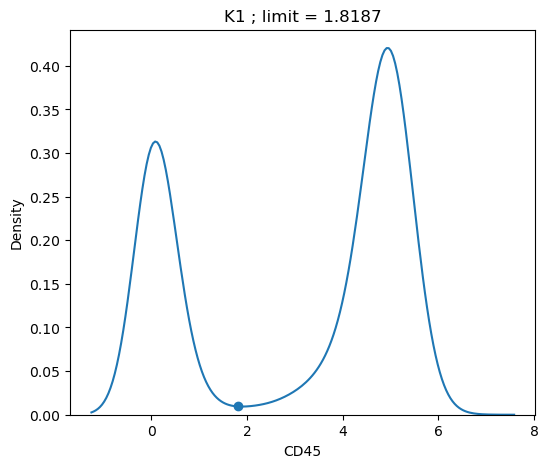

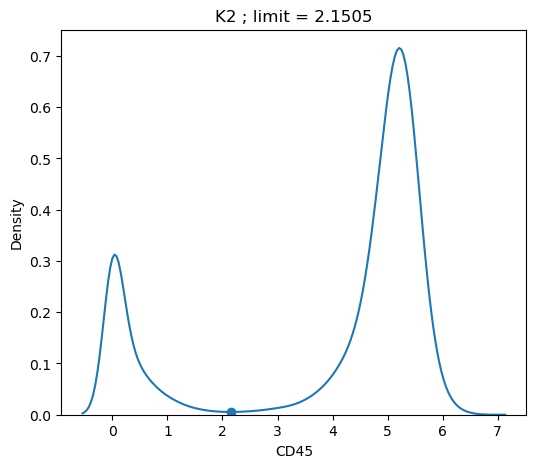

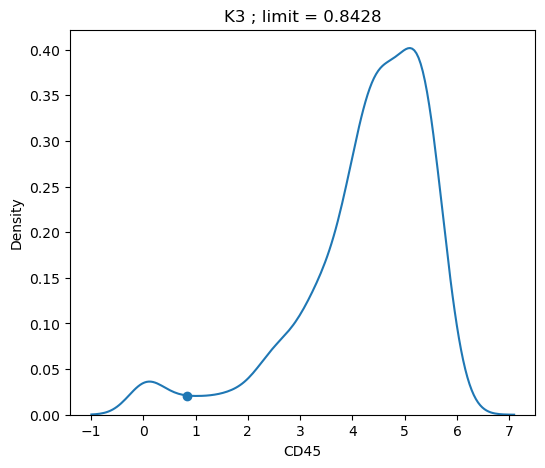

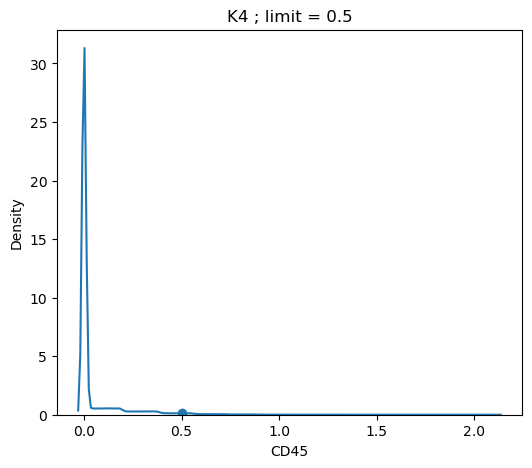

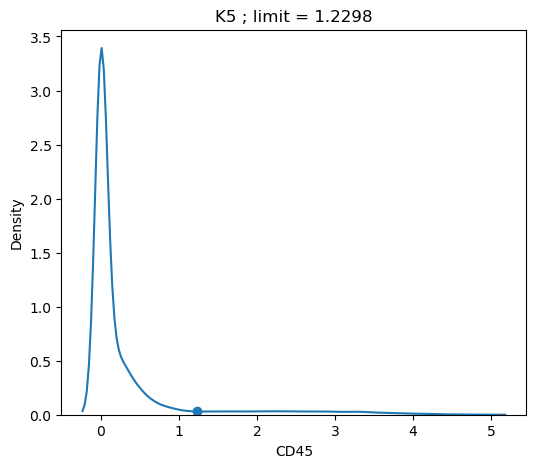

In [12]:


KCD45Neg_ind,KCD45pos_ind ,min_x, min_y = {},{},{},{}
for i, K in k.items():
    
    try:
      min_x[i],min_y[i] = splitInversePDF(K,i,'CD45')
    #   KCD45Neg = K[K[feature]<min_x].copy()
      KCD45Neg_ind[i]= K['CD45']<min_x[i]
      print ('k' + i+'; CD45 neg seperated')
      print('value with highest *inverse* probability:', min_x[i])
    except:
        print('k' + i,';minima not found')
    # if i=='2' or i=='1':
    #     KCD45pos_ind[i]= K['CD45']>min_x[i]
    #     print('CD45+ for i=2 copied')
print('manual')        
min_x['4'],min_y['4'] = splitInversePDF(k['4'],'4','CD45',min_x = 0.5)
KCD45Neg_ind['4']= k['4']['CD45']<min_x['4']
print('k4; value with highest *inverse* probability:', min_x['4'])
# kCD45Neg['5'], min_x['5'],min_y['5'] = splitInversePDF(k['5'],'5','CD45',min_x = 1)
# print('k5; value with highest *inverse* probability:', min_x['5'])

# if visualize:
for i, K in k.items():
    plotSplit(K,i,min_x,min_y,settings,Figname = '_cd45_split')
    
del min_x; del min_y

# # ThK1={'CD45': 1.8686868686868687}
# # ThK2={'CD45': 2.1717171717171717}







In [13]:
# if visualize:
#   colors = cm.rainbow(np.linspace(0, 1, len (k.keys())))
#   fig, ax = plt.subplots(1,2,figsize=(10,3))
#   for i, K in k.items(): 
#     #   
#     j =  names['figures'][int(i)-1]-1 
#     sns.histplot(K.CD45,color=colors[int(i)-1],label='T'+i,stat='density',element='step',fill=False,ax = ax[j])
#     ax[j].legend(loc='upper center',bbox_to_anchor=(1,1))
#     ax[j].set_yscale('log')
#     ax[j].title.set_text('cd45 split histplot')
#   plt.savefig(dir_plots+'cd45_split_histplot.svg', format="svg", bbox_inches="tight", pad_inches=0.2)

 


#   fig, ax = plt.subplots(1,2,figsize=(12,3))
#   for [i, K],[h, KCD45Neg] in zip( k.items(),kCD45Neg.items()):
#       j =  names['figures'][int(i)-1]-1 
#       sns.kdeplot(K.CD45,color=colors[int(i)-1],label='T'+i,ax = ax[j])
#       sns.kdeplot(K.CD45,color=colors[int(i)-1],ls='--',label='T'+i+' CD45-',ax = ax[j])
#       ax[j].legend(loc='upper center',bbox_to_anchor=(1,1))
#       ax[j].set_yscale('log')
#       ax[j].title.set_text('cd45 split kdeplot')
#   plt.savefig(dir_plots+'cd45_split_kdeplot.svg', format="svg", bbox_inches="tight", pad_inches=0.2)

      

Continue only with CD45 neg population

1 - delete cd45+ population and continue with k  = kCD45Neg

2 - delete cd45 feature from data 

In [14]:

dict ={}
for i, K in k.items():
    if i != '3':
    
    # if i !=3:   
        dict[i ] = K[KCD45Neg_ind[i]]
del k; k=dict 

dict ={}
for i, K in k.items():
  

  # remove from features lists(names)
  N = names[i]
  for j, sublist in N.items():
    try:
      sublist.remove('CD45')
    except:
      pass
    N[j] = sublist
  dict[i] = N
#   remove index 3 and copy to new dict
names['figures'].pop(3-1)
dict['figures'] = names['figures']
del names; names=dict 

# Normalize using new method on all intercellular markers

2 step normalization:

1- normalize gardient (TBD)

1- normalize using core

insight: since its the minima multiple rus with same effect as one run

note: features to norm (i.e names[i]['ToNorm']) are different on each sample

In [15]:
uncommonFeatures = ['NCad','ECad','panKeratin',  'p53', 'ZEB1' ]


# remove from the  mutual list uncommonFeatures
N = names['1'].copy()

for j, sublist in N.items():
    for f in uncommonFeatures:
        try:
            sublist.remove(f)
        except:
            pass
    N[j] = sublist
names['1245'] = N

names['figures'].append(2)


 # remove from data
appendDict ={}
for i, KK in k.items():
    K=KK.copy()
    for f in uncommonFeatures:
        try:
            K = K.drop(columns=[f])
        except:
            pass
    # print (K.columns)
    appendDict[i ] = K
    
# del k; k=dict 

# append data
NamesAll = names['1245']['NamesAll']
k_append= pd.DataFrame(columns =NamesAll)
for i, K in appendDict.items():

    K= subsample_k(K[NamesAll].copy(),n=1771)
    K['by_sample'] = int(i)
    k_append = k_append.append(K, ignore_index=True)
by_sampleInd = k_append['by_sample'].copy()
k['1245'] = k_append

k['1245']['by_sample'] = by_sampleInd
# k_append['by_sample'] = by_sampleInd
# print(len(by_sampleInd))

 size =  1771
 size =  39256
new size =  1771
 size =  366648
new size =  1771
 size =  63390
new size =  1771


/tmp/ipykernel_2867/2506776460.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_append = k_append.append(K, ignore_index=True)
/tmp/ipykernel_2867/2506776460.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_append = k_append.append(K, ignore_index=True)
/tmp/ipykernel_2867/2506776460.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_append = k_append.append(K, ignore_index=True)
/tmp/ipykernel_2867/2506776460.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k_append = k_append.append(K, ignore_index=True)


In [16]:
# if visualize:
#   for i, K in k.items():
#     print ('k' + i,', initial std:')
#     print(K.std().to_frame().T)




def normalize_data(k,sample,names):
    for [i, K] , j in zip(k.items(), names['figures']):
        
        
        # FIRST STEP - normalize_gardient by core 
        # SECOND STEP - normalize ToNorm fetures by the core features ['H3.3','H4']
        
        if j==1:
          K=NormalizeNew2(K,names[i]['ToNorm'])
          K = Mean_Core_normalization(K, names[i]['ToNorm'],coreFetures=['H3.3','H4'])
          
        elif j==2:
          K=NormalizeNew(K,names[i]['ToNorm'])
          K = Mean_Core_normalization(K, names[i]['ToNorm'],coreFetures=['H4','H3', 'H3.3'])
        else: 
          print ('error')
          break
        
        k[i] = K 
        print (sample + i,f'; normalized with method {j}')
    return k

k = normalize_data(k,'k',names)





k1 ; normalized with method 1
k2 ; normalized with method 1
k4 ; normalized with method 2
k5 ; normalized with method 2
k1245 ; normalized with method 2


In [17]:
# uncommonFeatures = ['NCad','ECad','panKeratin',  'p53', 'ZEB1' ]


# # remove from the  mutual list uncommonFeatures
# N = names['1'].copy()

# for j, sublist in N.items():
#     for f in uncommonFeatures:
#         try:
#             sublist.remove(f)
#         except:
#             pass
#     N[j] = sublist
# names['1245'] = N

# names['figures'].append(2)


#  # remove from data
# appendDict ={}
# for i, KK in k.items():
#     K=KK.copy()
#     for f in uncommonFeatures:
#         try:
#             K = K.drop(columns=[f])
#         except:
#             pass
#     # print (K.columns)
#     appendDict[i ] = K
    
# # del k; k=dict 

# # append data
# NamesAll = names['1245']['NamesAll']
# k_append= pd.DataFrame(columns =NamesAll)
# for i, K in appendDict.items():

#     K= subsample_k(K[NamesAll].copy(),n=1771)
#     K['by_sample'] = int(i)
#     k_append = k_append.append(K, ignore_index=True)
# by_sampleInd = k_append['by_sample'].copy()
# k['1245'] = k_append

# k['1245']['by_sample'] = by_sampleInd
# # k_append['by_sample'] = by_sampleInd
# # print(len(by_sampleInd))

Scale data 

using mean, std (whiten data) - achieve std close to 1 mean close to 0

In [18]:

for i, K in k.items():

    k[i] = scale_data(K)
    print (f'k{i} scaled')
    # print(K.std().to_frame().T)
# the index numbers are unfortunately passes into scaling and norm
# after scaling rturn the unscled index numbers
k['1245']['by_sample'] = by_sampleInd


k1 scaled
k2 scaled
k4 scaled
k5 scaled
k1245 scaled


In [19]:


if visualize:
    plot_hist(k,names['all']['NamesAll'],names['figures'],settings,
        func = sns.kdeplot,title = 'Normalized + Scaled',Figname = '2_Hist_normalized_scaled_' )     

Subsample data

verify; n<=5000 

In [20]:

# if subsample:
#   k = subsample_data(k,'k',n=5000)
# else:
for i, K in k.items():
    print ('k'+i+ '; samples = ', len(K), ', fetures = ', len(K.columns))
    


            


k1; samples =  1771 , fetures =  35
k2; samples =  39256 , fetures =  35
k4; samples =  366648 , fetures =  36
k5; samples =  63390 , fetures =  36
k1245; samples =  7084 , fetures =  33


## other
Save data to file (pickle)

convert images to pdf


In [21]:
for i, K in k.items():
  print ('k'+i+ '; samples = ', len(K), ', fetures = ', len(K.columns))

for i, K in k.items():
    try:
      del dict;dict ={}
    except:
        dict ={}
    dict['k'] = K
    pickle_dump('k'+i+'_dict', dict,dir_data)
    
    del dict;dict ={}
    dict = names[i]
    # dict['all'] = names['all']
    pickle_dump('k'+i+'_names_dict', dict,dir_data)
    print('k'+i,'; saved to file')



end = time.process_time()
print ('total run time =', end-start )

k1; samples =  1771 , fetures =  35
k2; samples =  39256 , fetures =  35
k4; samples =  366648 , fetures =  36
k5; samples =  63390 , fetures =  36
k1245; samples =  7084 , fetures =  33
k1 ; saved to file
k2 ; saved to file
k4 ; saved to file
k5 ; saved to file
k1245 ; saved to file
total run time = 50.5923633
